In [1]:

import pixiedust
import os
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as pth
from PIL.Image import *
from matplotlib import cm
from PIL import Image
import cv2
from PIL import Image
import scipy
from scipy import signal as sg
from scipy import ndimage
from numpy import linalg as LA

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from sklearn.cluster import KMeans
from matplotlib import patches

np.set_printoptions(precision=2,linewidth=500,suppress=True)

Pixiedust database opened successfully


Unable to check latest version <urlopen error timed out>


In [2]:
import sys
import os
print(os.path.dirname(sys.executable))

C:\Anaconda


# Image

In [3]:
def plot_3d(case):
    fig = plt.figure(figsize=plt.figaspect(0.2))
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')


    # Make data.
    X = np.arange(0, case.shape[0], 1)
    Y = np.arange(0, case.shape[0], 1)
    X, Y = np.meshgrid(X, Y)
    Z = (case,case)

    # Plot the surface.
    surf0 = ax0.plot_surface(X, Y, Z[0], cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)

    # Add a color bar which maps values to colors.

    ax1 = fig.add_subplot(1, 2, 2, projection='3d')

    surf1 = ax1.plot_surface( Y, Z[0],X, cmap=cm.coolwarm,
                           linewidth=1, antialiased=True)

    ax0.set_title('original defect')
    ax1.set_title('upper perspective')
    plt.savefig('fig')

    plt.show()

In [4]:
def multiple_imshow(rows,cols,images ,titles):

    plt.figure(len(images), figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
        #plt.xticks([]),plt.yticks([]) 
    plt.show()

def defect_detection(path,lower_bound,upper_bound,lower_bound_1 = [0,0,0],upper_bound_1 =[0,0,0]):
    
    img = cv2.imread(path,1)  # BGR color image reading and 0 flag for gray
    
    #blur = cv2.GaussianBlur(img,(5,5),0) #not good results
    #kernel = np.ones((5,5),np.float32)/25 #averaging is not satisfying as well
    #dst = cv2.filter2D(img,-1,kernel)
    #median = cv2.medianBlur(img,5)#median as well
    
    # converting it into Hue, saturation, value (HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
   
    '''Threshold'''
    
    # define range of red color in HSV
    lower = np.array(lower_bound)
    upper = np.array(upper_bound)
    
    # Threshold the HSV image to get only red colors
    mask_0 = cv2.inRange(hsv, lower, upper)
    mask_1 = cv2.inRange(hsv,np.array(lower_bound_1),np.array(upper_bound_1))
    mask =mask_0 + mask_1
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask = mask)
    
    return res


def pre_shaping(image,resol = [284,348]):
    
    #width = resol[1]
    #height = resol[0]
    #dim = (width, height) 
    
    # resize image
    #resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)#INTER_LINEAR_EXACT) 
    
    img = image
    rows,cols = img.shape
    
    frame = [[0,0],[cols,0],[0,rows],[cols,rows]]
    dimension = [[0,0],[resol[1],0],[0,resol[0]],[resol[1],resol[0]]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)
    resized = cv2.warpPerspective(img,M,(resol[1],resol[0]))
    
    return resized

def real_shaping(normalized_image,rows_dim,cols_dim,i = 8,j = 17):
    
    img = normalized_image
    rows,cols = img.shape
    
    frame = [[i,j],[rows,j],[i,cols],[rows,cols]]
    dimension = [[0,0],[cols_dim,0],[0,rows_dim],[cols_dim,rows_dim]]

    pts1 = np.float32(frame)
    pts2 = np.float32(dimension)

    M = cv2.getPerspectiveTransform(pts1,pts2)

    real_shape = cv2.warpPerspective(img,M,(cols_dim,rows_dim))
    
    return real_shape

# xy image

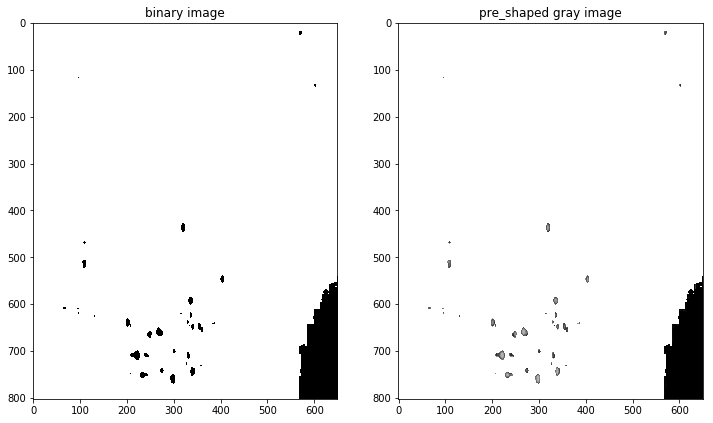

Wall time: 2.28 s


In [5]:
%%time
'''Functions call'''

path = "C:/Users/elh/Desktop/xy.png"

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound = [55,255,255] # for more defects the upper bound can go till ~105

res = defect_detection(path,lower_bound,upper_bound,[155,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) #convert to gray

#binary thresholding 
ret,thresh = cv2.threshold(imgray,0,1,cv2.THRESH_BINARY)
#th2 = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            #cv2.THRESH_BINARY,11,2) #consider some defects as noise


title = 'Global Thresholding (big defects)'

'''shaping'''
#gray image

#img = pre_shaping(img,resol = [350,285])
images = [255-thresh,255-imgray]#255-img]#i,j --> y,x
titles = ['binary image','pre_shaped gray image']

multiple_imshow(1,2,images ,titles)


In [6]:
img_xy = imgray # pre_shaped gray image

# xz image

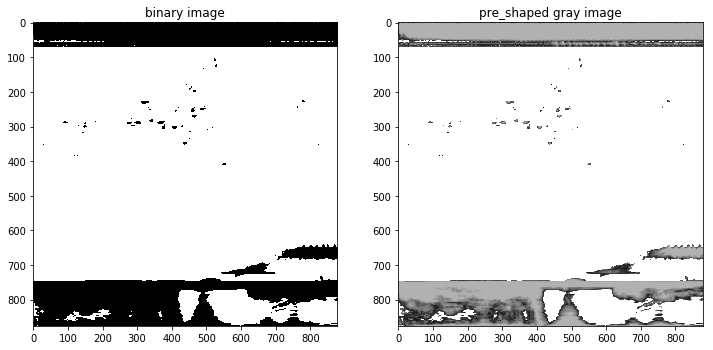

Wall time: 374 ms


In [7]:
%%time
'''Functions call'''

path = "C:/Users/elh/Desktop/xz.png"

''' Big defects : red_yellow'''

lower_bound = [0,0,0]
upper_bound = [55,255,255] # for more defects the upper bound can go till ~105

res = defect_detection(path,lower_bound,upper_bound,[155,0,0],[179,255,255])

"""Binary image to detect the center"""
imgray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY) #convert to gray

#binary thresholding 
ret,thresh = cv2.threshold(imgray,0,1,cv2.THRESH_BINARY)
#th2 = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            #cv2.THRESH_BINARY,11,2) #consider some defects as noise


title = 'Global Thresholding (big defects)'

'''shaping'''
#gray image

#img = pre_shaping(img,resol = [350,285])
images = [255-thresh,255-imgray]#255-img]#i,j --> y,x
titles = ['binary image','pre_shaped gray image']

multiple_imshow(1,2,images ,titles)


In [8]:
img_xz = imgray # pre_shaped gray image

# Sobel operator

In [9]:
def getCompassOperators(kind):
    res=np.empty([8,3,3])
    
    if kind=="kirsch":
        conv_mask = np.array([5,  5, 5,-3,-3,-3,-3,-3])
    elif kind=="robinson2":
        conv_mask = np.array([1,2,1,0,-1,-2,-1,0])
    elif kind=="robinson1":
        conv_mask = np.array([1,1,1,0,-1,-1,-1,0])
        
        """Discrete Laplacian 4"""
    elif kind=="laplace1":
        conv_mask = np.array([0,1,0,1,0,1,0,1])

        """Discrete Laplacian 8"""
    elif kind=="laplace2":
        conv_mask = np.array([1,1,1,1,1,1,1,1])
        
        """Robinson Laplacian (to take with you in a desert island)"""
    elif kind=="laplace3":
        conv_mask = np.array([1,-2,1,-2,1,-2,1,-2])
    
    for i in range(8):
        oneDir=np.zeros(9)
        oneDir[[0,1,2,5,8,7,6,3]]=conv_mask
        "to turn the coef"
        conv_mask=np.concatenate([conv_mask[1:],conv_mask[0:1]])
        res[i,:,:]=oneDir.reshape([3,3])
        
        if kind=="laplace1":
            res[i,1,1] = -4

            """Discrete Laplacian 8"""
        elif kind=="laplace2":
            res[i,1,1] = -8

            """Robinson Laplacian (to take with you in a desert island)"""
        elif kind=="laplace3":
            res[i,1,1] = 4

    return res

In [10]:
op = getCompassOperators("laplace2")
directions = ["N", "NW", "W", "SW", "S", "SE", "E", "NE"]
for i in range(8):
    print(directions[i])
    print(op[i])

N
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
NW
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
W
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
SW
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
S
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
SE
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
E
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
NE
[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]


We compute the gradients accoring to the 4 possible directions:

In [11]:
""" this function produce a rolling window which is just a view on the data: 
= a special way to move in the data. No copy is made.
"""
def rolling_windows_img(a,kshape):
    outShape=(a.shape[0]-kshape[0]+1,)+(a.shape[1]-kshape[1]+1,)+kshape
    outStrides=a.strides+a.strides
    return np.lib.stride_tricks.as_strided(a,shape=outShape,strides=outStrides)

In [12]:
def findLocalMin(data,kshape,minimum):
    
    dataRoll = rolling_windows_img(data,kshape)
    a,b = dataRoll.shape[0],dataRoll.shape[1]
    L = a*b
    W = kshape[0]*kshape[1]
    dataRoll = dataRoll.reshape(L,W)
    
    if minimum == True:
        armin = np.argmin(dataRoll,axis=1)
    else:
        armin = np.argmax(dataRoll,axis=1)
    
    res=np.array([],dtype=np.int8)
    extrema = 0
    for i, j in enumerate(armin):
        
        where = np.where((dataRoll[i,:] == dataRoll[i,j]))[0]
        
        if (j == W//2 and where.size == 1):
            coord = np.array([i//b + (kshape[0])//2 ,(i%a+ (kshape[1])//2)])
            res = np.append(res, coord)
            extrema +=1
            
    
    res = res.reshape(res.size//2,2)
    
    return res,extrema


# step 1 :Defect detection

In [13]:

"""pour que les dataFrame ne soient pas trop coupées dans la console"""
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('precision', 6)

"""
Available options:
display.[chop_threshold, colheader_justify, column_space, date_dayfirst,
         date_yearfirst, encoding, expand_frame_repr, float_format, height,
         line_width, max_columns, max_colwidth, max_info_columns, max_info_rows,
         max_rows, max_seq_items, mpl_style, multi_sparse, notebook_repr_html,
         pprint_nest_depth, precision, width]

""";

In [ ]:
def add_neighbours_in_stack(image, a, b, stack, i, j, inComponent):

    inComponent[i, j] = True
    neighbours = [(i+1,j),(i-1,j),(i,j-1),(i,j+1)]
    #neighbours = [(i-1,j-1),(i+1,j-1),(i+1,j),(i-1,j),(i,j-1),(i,j+1),(i-1,j+1),(i+1,j+1)]
    for (k,l) in neighbours:
        if 0<=k<image.shape[0] and 0<=l<image.shape[1]:
            if (image[k,l]>a and image[k,l]<b) and not inComponent[k, l]:
                inComponent[k, l] = True
                stack.append((k,l))
    return

In [ ]:
def connected_component_nb(image, seuil, i0,j0, inComponent):
    stack = [(i0,j0)]
    defect = []
    nb=1
    barycentre = [i0,j0]
    while len(stack)>0:
        (i,j) = stack.pop()
        nb+=1  
        add_neighbours_in_stack(image, seuil, 260, stack, i, j, inComponent)
        
        defect.append((i,j))
        barycentre[0] += i
        barycentre[1] += j
            
    barycentre[0] /= nb
    barycentre[1] /= nb
    
    return nb-1, barycentre,defect

In [ ]:

def all_connected_components(image, seuil):

    inComponent = np.empty(image.shape, dtype=np.bool)
    inComponent[:, :] = False # stoping test

    baryAndSizes = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>seuil and not inComponent[i,j]:
                baryAndSizes.append(connected_component_nb(image,seuil,i,j,inComponent))
                
    return baryAndSizes

In [14]:
'''all defects'''

def defect_collection(image,thresh,plot):
    
    baryAndSizes = all_connected_components(image, thresh)
    number_of_defects = len(baryAndSizes)
    
    x = np.array([],dtype=float)
    y= np.array([],dtype=float)
    size = np.array([],dtype=np.int8)
    defects = np.array([],dtype=int)
    
     
    '''defects list''' 
    for i in range(number_of_defects):#baryAndSizes = nb, barycentre,defect
        x = np.append(x, baryAndSizes[i][1][0])
        y = np.append(y, baryAndSizes[i][1][1])
        size = np.append(size, baryAndSizes[i][0])
        defects = np.append(defects, baryAndSizes[i][2])
   
    '''plot'''
    if plot:
        fig, ax = plt.subplots(1,3, figsize = (22,12))
        fig.suptitle('Results', fontsize=16)
        ax[0].set_xlim(0,image.shape[1])
        ax[1].set_xlim(0,image.shape[1])
        ax[2].set_xlim(0,image.shape[1])

        title = ['Detected defects centers','Detected defects as discs']
        ax[0].imshow(255-image, cmap='gray', vmin = 0, vmax = 255,)
        ax[0].scatter(y, x, marker='+', s=size, c = 'r', alpha = 0.5)
        ax[0].set_title(title[0])

        ax[0].set_xlabel('x')
        ax[0].set_ylabel('y')

        ax[1].imshow(255-image, cmap='gray', vmin = 0, vmax = 255,)
        ax[1].scatter(y, x, marker='o', s=size, c = 'b', alpha = 0.5)
        ax[1].set_title(title[1])

        ax[1].set_xlabel('x')
        ax[1].set_ylabel('y')
        fig.show()
    
    return y, image.shape[0]-x, size,defects #return the cooordinates in x,y axis

# Step 2: defects area,centers and coordinates

## Convert (x,y) <--> (i,j)

In [15]:
def xy_ij(xy_coord,dim_y):
    
    xy_coord = np.array(xy_coord)
    
    ij_coord = np.fliplr(xy_coord)
    ij_coord[:,0] =  dim_y - ij_coord[:,0]
    
    return ij_coord

def ij_xy(ij_coord,dim_y):
    
    ij_coord = np.array(ij_coord)
    
    ij_coord[:,0] =  dim_y - ij_coord[:,0]
    xy_coord = np.fliplr(ij_coord)
    
    return xy_coord
    

In [16]:
def get_defect_intensity(img,defect): #pixel should np.array (x,y)
    
    defect = np.array(defect)
    #defect = xy_ij(defect,img.shape[0])
    i = defect[:,0] 
    j = defect[:,1]
    intensity = img[i.astype(int),j.astype(int)]
    
    return intensity

In [17]:
def clean_defects(pandasoutput,lines_to_delete):
    
    output = pandasoutput.drop(lines_to_delete)
    
    return output
    

In [18]:
def defect_matrix(img,defect,Gaussianshape):
    
    defect = np.array(defect)
    
    i_min = np.min(defect[:,0])#starting line index
    i_max = np.max(defect[:,0]+1)#last line index (+1 for python)
    j_min = np.min(defect[:,1])#starting column index
    j_max = np.max(defect[:,1]+1)#last column index (+1 for python)
    
    defect_shape = img[i_min:i_max,j_min:j_max].shape

    dim = np.max(defect_shape)
    matrix = np.zeros((dim,dim))

    #assert (img[i_min:i_max,j_min:j_max][img[i_min:i_max,j_min:j_max]!= 0.].size 
            #== get_defect_intensity(img,defect).size)

    matrix[0:defect_shape[0],0:defect_shape[1]] = img[i_min:i_max,j_min:j_max].copy()

    matrix = cv2.GaussianBlur(matrix,(Gaussianshape,Gaussianshape),0) #smoothing
    
    return matrix

In [19]:
def extrema_number(local_window_dim,Mat):
    kshape = min(local_window_dim,Mat.shape[0])

    if kshape%2 == 0:
        kshape = kshape -1
        
    mini,number_extrema = findLocalMin(Mat,(kshape,kshape),True)
    
    if number_extrema == 0:
        number_extrema=1
    
    return number_extrema 

In [20]:
def ellipse_features(defect,s_error):
    
    defect = defect.T#defect should be an array of shape (2,...)!!
    
    cov = np.cov(defect)
    w, v = LA.eig(cov)#eigen values, eigen vectors

    index = np.argmax(w) #the coreesponding value to the biggest eigen value
    
    if np.abs(v[0,index]) == 0:
        angle = np.sign(v[1,index])*90.
    else:
        angle = np.arctan(v[1,index]/np.abs(v[0,index]))
        angle = math.degrees(angle)

    stand_dev_x= np.sqrt(np.float(s_error)*w[0])#Standard deviation on the direction of eigen vector of position 0

    stand_dev_y= np.sqrt(np.float(s_error)*w[1])#Standard deviation on the direction of eigen vector of position 1

    return angle, stand_dev_x,stand_dev_y


In [21]:
def separation(img,case,number_extrema,s_error):
    
    points = np.array(case)#i,j
    pts = ij_xy(points,img.shape[0])
    
    '''
    plt.plot(pts[:,0],pts[:,1],"o");
    '''
    
    """creation of the algo"""
    kmeans=KMeans(n_clusters=number_extrema)
    """computation of centroids"""
    kmeans.fit(pts)
    """here is the result"""
    centroids = kmeans.cluster_centers_
    labels = kmeans.predict(pts)
    
    '''
    plt.scatter(pts[:,0],pts[:,1],c=labels,marker="+");
    for centroid in centroids:
        plt.plot(centroid[0],centroid[1],"o")
    '''
    
    assertion = 0
    sub_defects = []
    Features = []
    for i in range(number_extrema):
        sub_defects.append(pts[labels == i])#x,y replace with points if i,j
        Features.append([ellipse_features(sub_defects[i],s_error)])
        assertion += sub_defects[i].size//2
        
    assert (assertion == points.size//2)
        
    return centroids,sub_defects,Features #x,y
    

In [97]:
def defects_output(img,x, y, size,alldefects,upper_intensity):
    
    alldefect = alldefects.reshape((alldefects.size//2,2))#i,j
    
    alldefect = alldefect.tolist()
    centers = np.stack((x, y), axis=-1)
    mean_intensity = []
    
    output = pd.DataFrame([[],[], [],[]]).T

    drop=[]
    for i,j in enumerate(size):
        ieme_defect = pd.DataFrame(alldefect[0:j])
        i_max = np.max(ieme_defect[0])
        Intensity = get_defect_intensity(img,ieme_defect)
        mean_intensity = np.mean(Intensity)
        if mean_intensity > upper_intensity or j > 3*upper_intensity or i_max < z[0] or i_max > z[1]:
            drop.append(i)
 
        ith_line = pd.DataFrame([[centers[i,:].round(2), size[i],mean_intensity.round(2),ieme_defect]],
                                index = np.array([i]))
        output = output.append(ith_line)
        alldefect = alldefect[j:]

    output.columns = ['Centers in (x,y)', 'Area','Average intensity', 'the ith defect in (i,j)'] 
    assert(np.array_equal(np.array([output['the ith defect in (i,j)'][i].size//2 for i in range(len(size))]),size))
    
    output['Area']=output['Area'].astype(int)
    
    output = clean_defects(output,drop)
    print len(drop) , 'defects were cleared '

    return output #i,j

In [98]:
def defects_separation(img,output,Localshape,Gaussianshape,s_error):#dataframe output of defects after noise and artifacts elimination
    
    separated_output = pd.DataFrame([]).T
    
    for index, row in output.iterrows():
        
        ieme_defect = row['the ith defect in (i,j)']

        '''matrix of each defect'''

        matrix = defect_matrix(img,ieme_defect,Gaussianshape)
        
        '''Gradient norm'''
        
        operators=getCompassOperators("robinson2")
        all_grad = np.abs(np.array([sg.convolve(matrix, operators[i,:,:], "valid") for i in range(4)]))
        Norme = np.sqrt(all_grad[0,:,:]**2 + all_grad[1,:,:]**2+all_grad[2,:,:]**2+all_grad[3,:,:]**2)
        
        '''Extrema'''
    
        if matrix.shape[0] <=8:
            extrema = 1
        else:
            extrema = extrema_number(Localshape,Norme)
        
        '''separation and ellipse_features'''
        
        centroids,sub_defects,Features = separation(img,ieme_defect,extrema,s_error)
        
        ith_line = pd.DataFrame([[extrema,centroids.round(2),sub_defects,Features]],index = np.array([index]))
        separated_output = separated_output.append(ith_line)


    separated_output.columns = ['extrema','centroids','sub_defects','Features']
    
    separated_output['extrema']=separated_output['extrema'].astype(int)
    

    return separated_output #x,y

In [99]:
def plot_defects(img,output,localwindow,gaussianwindow,segmentation,s_error):
    
    fig=plt.figure(figsize=(12,9))
    
    output_subdefect = defects_separation(img,output,localwindow,gaussianwindow,s_error)
    
    index = output_subdefect['extrema'][output_subdefect['extrema'] >= segmentation].index #indexes of the ouput defects according to segmentation 
    values = output_subdefect ['extrema'][output_subdefect['extrema'] >= segmentation].values # number of subdefects according to segmentation
    
    Number_of_defects = sum(output_subdefect ['extrema'].values)

    defects = output_subdefect['sub_defects'][output_subdefect['extrema'] >= segmentation]#defects column according to segmentation
    for k,i in enumerate(index):
        case = defects[i]
        seg = values[k]
        for j in range(seg):
            if seg == 1:
                plt.plot(case[j][:,0],case[j][:,1],"k.");
            else:
                plt.plot(case[j][:,0],case[j][:,1],".");
            
    plt.title('defects segmented')
    plt.show();
    print 'There are ', Number_of_defects, 'total detected defected'
    
    return output_subdefect
        

# covariance error ellipse

In [100]:
'''optional'''
def centrelize(case):
    
    x_min = np.min(case[:,0])
    y_min = np.min(case[:,1])
    
    case[:,0] = case[:,0] - x_min
    case[:,1] = case[:,1] - y_min
    
    return case

In [101]:
def plot_ellipse(ax,centroid,angle, stand_dev_x,stand_dev_y,defect,fill = False,edgecolor = 'black'):
    
    #fig = plt.figure(figsize=(16,16)) #decommented when drwing one ellipse
    #ax = fig.add_subplot(111, aspect='equal')#decommented when drwing one ellipse
    #ax.scatter(defect[:,0], defect[:,1],marker="+")
    ax.imshow(np.flip(imgtosuperimpose, 0),cmap='jet')
    
    x = centroid[0] #x coordinate
    y = centroid[1] #y coordinate

    e = patches.Ellipse((x, y), stand_dev_y, stand_dev_x,angle=angle, linewidth=2, fill=fill,edgecolor=edgecolor)

    ax.add_patch(e)
    ax.set_title('Estimated detected defects with their error ellipse');
    
    ax.add_artist(e)
    e.set_alpha(0.9)
    e.set_facecolor([0.1,1,0])#green


In [102]:
def plot_all_ellipses(sub_defects,segmentation,s_error):
    
    fig = plt.figure(figsize=(12,9)) 
    
    ax = fig.add_subplot(111, aspect='equal')
    
    index = sub_defects ['extrema'][sub_defects['extrema'] >= segmentation].index 
    #indexes of the ouput defects according to segmentation 
    values = sub_defects['extrema'][sub_defects['extrema'] >= segmentation].values 
    # number of subdefects according to segmentation
    
    for k,i in enumerate(index):

        seg = values[k]
   
        for j in range(seg):
            '''Ellipse features'''
            case = sub_defects['sub_defects'][i][j]
            centroid = sub_defects['centroids'][i][j]
            angle, stand_dev_x,stand_dev_y = sub_defects['Features'][i][j][0];
            
            if seg == 1:
                
                plot_ellipse(ax,centroid,angle,2* min([stand_dev_y,stand_dev_x]),
                             2*max([stand_dev_y,stand_dev_x]),case,True)#fill and edge color are optional arg
                
            else:
                
                plot_ellipse(ax,centroid,angle, 2*min([stand_dev_y,stand_dev_x]),
                             2*max([stand_dev_y,stand_dev_x]),case,True,'blue')#fill and edge color are optional arg
                
    return ax

# post-processing

In [103]:
def post_processing(polygon,coordinates,area):
    old_dim = len(coordinates)
    p = pth.Path(polygon)
    mask = p.contains_points(coordinates)
    reduced_coord = coordinates[mask]
    reduced_area = area[mask]
    new_dim = len(reduced_coord)
    print(old_dim-new_dim,' values were reduced')
    return reduced_coord,reduced_area

def resizing(img,reduced_coord,dim):
    
    k_x = np.array(img.shape[1]/dim[0],dtype=float)
    k_y = np.array(img.shape[0]/dim[1],dtype=float)
    
    coord = reduced_coord.copy().astype(float)
    coord[:,0],coord[:,1] = reduced_coord[:,0]/k_x,reduced_coord[:,1]/k_y
    
    return coord

In [104]:
def coef_dimij_dimxz(img,dimxy,z):
    
    k_z = np.array(img.shape[0]/dimxy[1],dtype=float)*z
    
    return k_z

# Step 1: collection of defects

In [105]:
z0 = img_xy.shape[0]+1 #no artifact in xy image
z = [0,z0]
z


[0, 804L]

In [106]:
%%time
x_xy, y_xy, size_xy,alldefects_xy = defect_collection(img_xy,0,False)#plot false, 0 for threshold
x_xz, y_xz, size_xz,alldefects_xz = defect_collection(img_xz,0,False)

Wall time: 7.98 s


# Step 2: cleaning defects and structuring

In [107]:
%%time
output_xy = defects_output(img_xy,x_xy, y_xy, size_xy,alldefects_xy,200)

3 defects were cleared 
Wall time: 125 ms


In [109]:
output_xy

,"Centers in (x,y)",Area,Average intensity,"the ith defect in (i,j)"
0,"[569.0, 781.0]",46,174.35,0 1 0 19 567 1 19 568 2 19 56...
1,"[96.0, 686.0]",8,148.75,0 1 0 117 95 1 117 96 2 117 97 3 ...
2,"[600.0, 669.0]",32,172.16,0 1 0 131 599 1 131 600 2 131...
3,"[557.0, 459.0]",4,162.75,0 1 0 344 557 1 344 558 2 345 55...
4,"[319.0, 366.0]",148,146.46,0 1 0 428 317 1 428 318 2 ...
5,"[109.0, 335.0]",18,163.67,0 1 0 466 109 1 466 110 2 467...
6,"[108.0, 289.0]",104,149.49,0 1 0 508 106 1 508 107 2 ...
7,"[403.0, 256.0]",94,141.86,0 1 0 538 403 1 538 404 2 539...
9,"[335.0, 211.0]",122,139.51,0 1 0 586 333 1 586 334 2 ...
10,"[66.0, 195.0]",30,147.53,0 1 0 607 63 1 607 64 2 607 6...


In [113]:
X = output_xy['Average intensity']

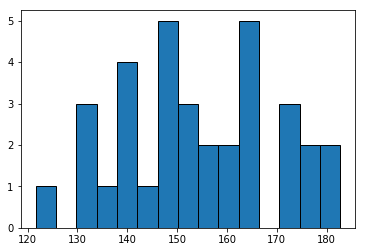

In [114]:
plt.hist(X,bins=15,edgecolor="k");

In [85]:
z = coef_dimij_dimxz(img_xz,[280.,280.],[20,200])#20,200 are the boundry downof artifacts
z

array([ 62.57, 625.71])

In [86]:
output_xz = defects_output(img_xz,x_xz, y_xz, size_xz,alldefects_xz,200)

45 defects were cleared 


In [36]:
output_xz

,"Centers in (x,y)",Area,Average intensity,"the ith defect in (i,j)"
2,"[523.0, 768.0]",32,166.22,0 1 0 105 522 1 105 523 2 105...
4,"[527.0, 752.0]",44,175.73,0 1 0 121 526 1 121 527 2 121...
5,"[490.0, 743.0]",4,156.25,0 1 0 133 490 1 133 491 2 134 49...
8,"[452.0, 687.0]",32,172.91,0 1 0 185 454 1 185 455 2 185...
9,"[465.0, 677.0]",44,153.84,0 1 0 197 462 1 197 463 2 197...
10,"[778.0, 649.0]",44,177.16,0 1 0 225 776 1 225 777 2 225...
11,"[322.0, 646.0]",148,140.03,0 1 0 227 315 1 227 316 2 ...
14,"[493.0, 634.0]",14,151.43,0 1 0 241 492 1 241 493 2 241...
15,"[762.0, 632.0]",10,149.30,0 1 0 243 762 1 243 763 2 244 76...
19,"[487.0, 626.0]",92,169.45,0 1 0 247 490 1 247 491 2 247...


# Step 3: Segmentation of defects and demonstration

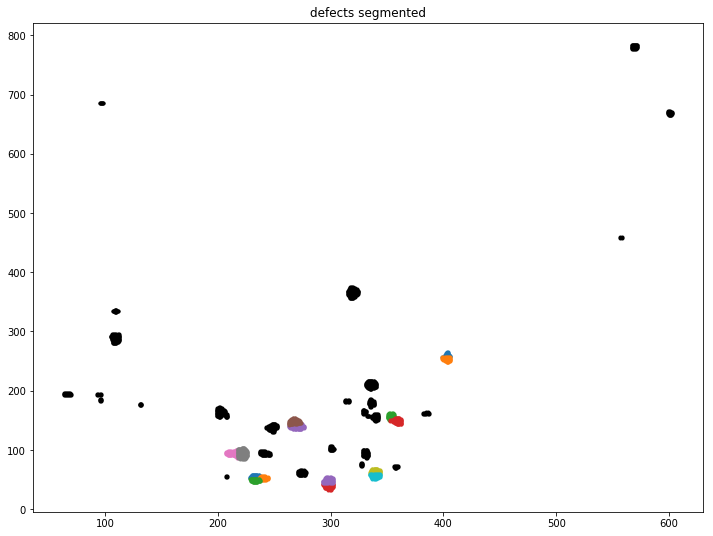

There are  42 total detected defected
Wall time: 592 ms


In [37]:
%%time
a = plot_defects(img_xy,output_xy,7,5,1,5);#Localshape,Gaussianshape,seg

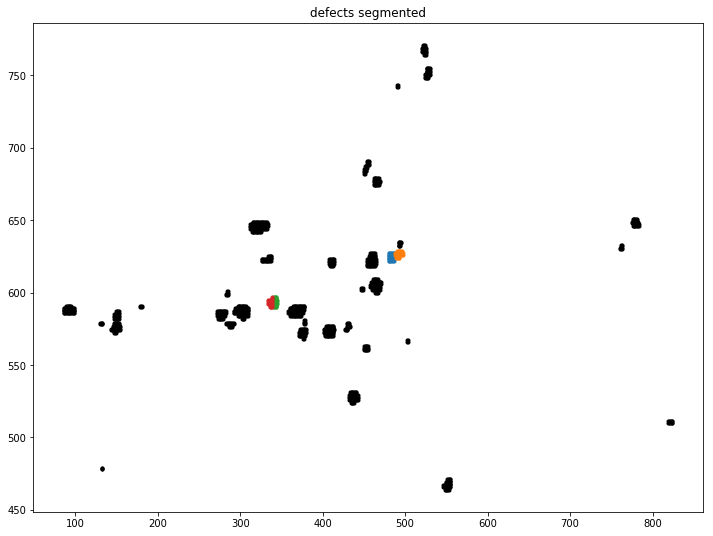

There are  38 total detected defected


In [38]:
b = plot_defects(img_xz,output_xz,3,17,1,5);#Localshape,Gaussianshape,seg

# Step 4: Estimation of defects with ellipse shape

In [39]:
imgtosuperimpose = img_xy
img_xy.shape

(803L, 650L)

Wall time: 281 ms


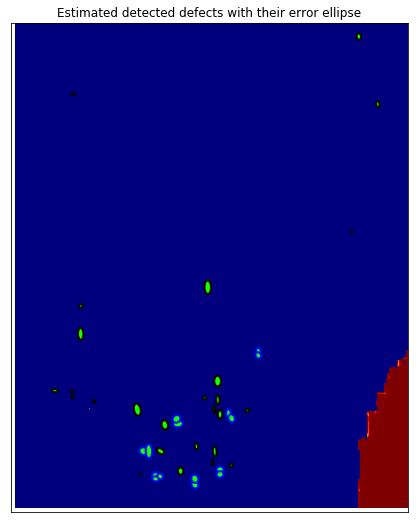

In [40]:
%%time
ax = plot_all_ellipses(a,0,5.991)

ax.set_xlim(-7,650)
ax.set_ylim(-7, 803);
plt.xticks([])
plt.yticks([])



In [41]:
imgtosuperimpose = img_xz
img_xz.shape

(876L, 879L)

([], <a list of 0 Text yticklabel objects>)

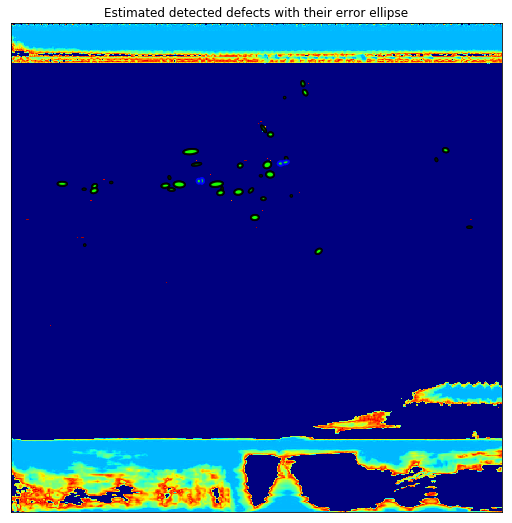

In [42]:
ax = plot_all_ellipses(b,0,5.991)
ax.set_xlim(0,879)
ax.set_ylim(0, 876);
plt.xticks([])
plt.yticks([])

# Step 5: 3D reconstruction of defects 

In [43]:
def list_array(Column):
    
    Column_list = np.array([val for sublist in Column for val in sublist])
    Column_list = Column_list.reshape((Column_list.shape[0],Column_list.size/Column_list.shape[0]))

    array = pd.DataFrame(Column_list)
    
    return array
    

In [44]:
def projection_x(Column):
    
    feat = list_array(Column)
    
    x_a = np.cos(np.radians(feat[0]))*np.maximum(feat[1],feat[2]) #a,b
    x_b = np.cos(np.radians(90-np.abs(feat[0])))*np.minimum(feat[1],feat[2])
    
    x = np.maximum(x_a,x_b)
    
    return x
    

In [45]:
#xy and xz are the coordinates of the defects centers
#x_z is the projection on x axis of xz plan

def assignement(features_xy,centroids_xy,features_xz,centroids_xz,coef=1): #if xy.size > xz.size
    
    '''xz plan'''
    x_z = projection_x(features_xz)#projection on x axis of xz plan
    xz = list_array(centroids_xz)#centers of defects
    s_dev_xz = list_array(features_xz)#(44,3)array of ellipse features
    
    '''xy plan'''
    x_y = projection_x(features_xy)
    xy = list_array(centroids_xy)
    s_dev_xy = list_array(features_xy)
    
    '''matching indexes'''
    coef = coef
    index_xyz =[]
    
    if xy[0].size < xz[0].size :
        xy,xz = xz,xy
        
    for i,x_xy in enumerate(xy[0].values):
        for k,x_xz in enumerate(xz[0].values):
            if ((x_xy >= (x_xz - coef*x_z[k])) and (x_xy <= (x_xz + coef*x_z[k]))):
                index_xyz.append([i,k])
    print 'There',len(index_xyz),'matching defects'

    index_xyz = np.array(index_xyz)

    '''matching coordinates'''
    x = np.array(xy[0])
    x = x[index_xyz[:,0]]
    y = np.array(xy[1])
    y = y[index_xyz[:,0]]
    z = np.array(xz[1])
    z = z[index_xyz[:,1]]
    '''matching stand deviations'''
    sig_x = np.array(s_dev_xy[1])
    sig_x = sig_x[index_xyz[:,0]]
    sig_y = np.array(s_dev_xy[2])
    sig_y = sig_y[index_xyz[:,0]]
    sig_z = np.array(s_dev_xy[1])
    sig_z = sig_z[index_xyz[:,1]]
    '''matching angles'''
    angle_xy = np.array(s_dev_xy[0])
    angle_xy = angle_xy[index_xyz[:,0]]
    angle_xz = np.array(s_dev_xy[0])
    angle_xz = angle_xz [index_xyz[:,1]]

    return np.array([np.array([x,y,z]),np.array([sig_x,sig_y,sig_z]),np.array([angle_xy,angle_xz])])

coef = 1
index_z =[]
for i,x_xz in enumerate(xz[0].values):
    for k,x_xy in enumerate(xy[0].values):
        if ((x_xz >= (x_xy - coef*x_y[k])) and (x_xz <= (x_xy + coef*x_y[k]))):
            index_z.append([k,i])
    

len(index_z)
    

## xy outputs

In [46]:
a.index.size #before segmentation

34

In [47]:
np.sum(a['extrema'])#after segmentation

42

In [48]:
features = a['Features']
centroids = a['centroids']

x_y = projection_x(features)
xy = list_array(centroids)
s_dev_xy = list_array(features)

In [49]:
features

0     [[(-81.7558397155, 3.7221363839826678, 5.10974...
1     [[(0.0, 2.6726124191242437, 1.1952286093343936)]]
2     [[(-78.2916989846, 2.815414352051397, 4.747331...
3     [[(0.0, 1.2909944487358056, 1.2909944487358056)]]
4     [[(-88.6505146129, 5.41017884096938, 11.128214...
5     [[(90.0, 2.6071796295834764, 3.276475868619675...
6     [[(-88.4275601075, 4.466397909309385, 9.772474...
7     [[(-84.1616310845, 3.692196619668206, 5.416829...
9     [[(-88.2284990702, 5.6510582200985535, 8.72539...
10    [[(-4.06633050052, 4.954925690831907, 2.520121...
11    [[(0.0, 2.6726124191242437, 1.1952286093343936)]]
12    [[(90.0, 1.1952286093343936, 2.672612419124243...
13    [[(-88.2519125882, 2.7919999575226853, 7.69681...
14      [[(0.0, 2.581988897471611, 2.581988897471611)]]
15    [[(90.0, 1.1952286093343936, 2.672612419124243...
16    [[(-77.7029240864, 5.488223252572832, 10.13749...
18    [[(90.0, 1.7167901505579042, 4.839530207734935)]]
20    [[(13.7764057884, 3.672924437514465, 2.200

## xz outputs

In [50]:
b.index.size#before segmentation

36

In [51]:
np.sum(b['extrema'])#after segmentation

38

In [52]:
features = b['Features']
centroids = b['centroids']

x_z = projection_x(features)#projection on x axis of xz plan
xz = list_array(centroids)#centers of defects
s_dev_xz = list_array(features)#(44,3)array of ellipse features

# Assignement according to projection on x

In [53]:
features_xz = b['Features']
centroids_xz = b['centroids']
features_xy = a['Features']
centroids_xy = a['centroids']

In [54]:
%time
#(x,y.z),(sigx,sigy,sigz),(anglexy,anglexz)
Ellipsoid_features = assignement(features_xy,centroids_xy,features_xz,centroids_xz,coef=1.052)

Wall time: 0 ns
There 40 matching defects


## Coordinates (x,y,z)

In [55]:
x,y,z = Ellipsoid_features[0]

In [56]:
x

array([ 96.5 , 319.28, 403.1 , 402.93, 335.57, 335.57, 335.57,  94.5 ,  95.5 , 336.  , 336.  , 336.  , 314.5 , 131.5 , 131.5 , 329.8 , 329.8 , 358.68, 339.67, 339.67, 339.67, 333.  , 333.  , 333.  , 270.03, 300.56, 330.9 , 330.9 , 327.5 , 327.5 , 357.86, 339.67, 339.67, 339.67, 339.51, 339.51, 339.51, 274.28, 297.99, 297.9 ])

In [57]:
y

array([685.5 , 365.61, 259.9 , 252.87, 210.17, 210.17, 210.17, 193.5 , 184.5 , 179.35, 179.35, 179.35, 182.5 , 176.5 , 176.5 , 164.5 , 164.5 , 148.68, 155.1 , 155.1 , 155.1 , 157.5 , 157.5 , 157.5 , 139.51, 102.25,  93.77,  93.77,  75.5 ,  75.5 ,  70.93,  63.51,  63.51,  63.51,  55.78,  55.78,  55.78,  61.25,  38.92,  48.38])

In [58]:
z

array([588.1 , 645.77, 573.52, 573.52, 645.77, 623.09, 592.97, 588.1 , 588.1 , 645.77, 623.09, 592.97, 645.77, 578.5 , 478.5 , 645.77, 623.09, 587.53, 623.09, 593.5 , 592.97, 645.77, 623.09, 592.97, 584.83, 587.07, 645.77, 623.09, 645.77, 623.09, 587.53, 623.09, 593.5 , 592.97, 623.09, 593.5 , 592.97, 584.83, 587.07, 587.07])

## Standard deviation (x,y,z)

In [59]:
sig_x,sig_y,sig_z = Ellipsoid_features[1]

In [60]:
sig_x

array([2.67, 5.41, 3.69, 4.32, 5.65, 5.65, 5.65, 2.67, 1.2 , 2.79, 2.79, 2.79, 2.58, 1.2 , 1.2 , 1.72, 1.72, 5.21, 3.56, 3.56, 3.56, 2.  , 2.  , 2.  , 8.09, 2.73, 2.94, 2.94, 1.17, 1.17, 2.96, 5.87, 5.87, 5.87, 5.75, 5.75, 5.75, 4.41, 5.43, 5.67])

In [61]:
sig_y

array([ 1.2 , 11.13,  5.42,  5.39,  8.73,  8.73,  8.73,  1.2 ,  2.67,  7.7 ,  7.7 ,  7.7 ,  2.58,  2.67,  2.67,  4.84,  4.84,  6.79,  6.92,  6.92,  6.92,  1.22,  1.22,  1.22,  5.67,  4.95,  8.31,  8.31,  3.99,  3.99,  2.31,  5.48,  5.48,  5.48,  5.25,  5.25,  5.25,  5.94,  6.66,  6.9 ])

In [62]:
sig_z

array([3.88, 4.47, 6.47, 6.47, 4.47, 1.2 , 3.67, 3.88, 3.88, 4.47, 1.2 , 3.67, 4.47, 2.73, 5.68, 4.47, 1.2 , 2.  , 1.2 , 1.72, 3.67, 4.47, 1.2 , 3.67, 6.78, 3.56, 4.47, 1.2 , 4.47, 1.2 , 2.  , 1.2 , 1.72, 3.67, 1.2 , 1.72, 3.67, 6.78, 3.56, 3.56])

## Angle according to xy anxz plans

In [63]:
angle_xy,angle_xz = Ellipsoid_features[2]

In [64]:
angle_xy

array([  0.  , -88.65, -84.16, -58.72, -88.23, -88.23, -88.23,   0.  ,  90.  , -88.25, -88.25, -88.25,   0.  ,  90.  ,  90.  ,  90.  ,  90.  , -68.79, -89.45, -89.45, -89.45,   0.  ,   0.  ,   0.  ,   4.4 , -82.6 , -85.93, -85.93,  90.  ,  90.  ,  20.05,  -1.89,  -1.89,  -1.89,  29.78,  29.78,  29.78, -88.99, -66.45, -69.28])

In [65]:
angle_xz

array([-88.69, -88.43, -31.96, -31.96, -88.43,  90.  ,  13.78, -88.69, -88.69, -88.43,  90.  ,  13.78, -88.43, -82.6 ,  22.03, -88.43,  90.  ,   0.  ,  90.  ,  90.  ,  13.78, -88.43,  90.  ,  13.78,  39.21, -89.45, -88.43,  90.  , -88.43,  90.  ,   0.  ,  90.  ,  90.  ,  13.78,  90.  ,  90.  ,  13.78,  39.21, -89.45, -89.45])

## 3D plot

In [66]:
# check for xz img_xz.shape[0]
def plot_3d_2d(x,y,z):
    
    #z= img_xz.shape[0]-z
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection='3d')

    ax.plot(x, y, z,'bo', label='3D Centroids',alpha =0.5)
    ax.set_title('3D reconstruction of defects position')
    
    ax.plot(x, z, 'r+', zdir='y', zs=np.max(y)+50, label='2D projection on x,z',alpha =0.5)
    ax.plot(x, y, 'g+', zdir='z', zs=np.min(z)-50, label='2D projection on x,y',alpha =0.5)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim([np.min(x)-50, np.max(x)+50])
    ax.set_ylim([np.min(y)-50, np.max(y)+50])
    ax.set_zlim([np.min(z)-50, np.max(z)+50])
    ax.legend()
    plt.savefig('fig')
    
    plt.show()
    
    

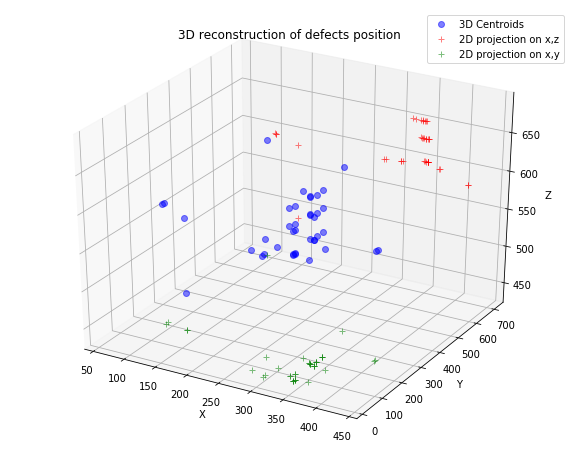

Wall time: 343 ms


In [67]:
%%time
plot_3d_2d(x,y,z)

## 3D estimated ellipsoids

In [68]:
import numpy as np
from numpy import linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

In [69]:
def one_ellipsoid_3D(ax,Ellipsoid_features,i,scale =40):
        
        
        x0,y0,z0 = Ellipsoid_features[0]
        sig_x,sig_y,sig_z = Ellipsoid_features[1]
        
        coefs = (sig_x[i]**2, sig_y[i]**2, sig_z[i]**2)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
        # Radii corresponding to the coefficients:
        rx, ry, rz = scale/np.sqrt(coefs)

        # Set of all spherical angles:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)

        # Cartesian coordinates that correspond to the spherical angles:
        # (this is the equation of an ellipsoid):
        x = rx * np.outer(np.cos(u), np.sin(v))+x0[i]
        y = ry * np.outer(np.sin(u), np.sin(v))+y0[i]
        z = rz * np.outer(np.ones_like(u), np.cos(v))+z0[i]

        # Plot:
        ax.plot_surface(x, y, z,rstride=1, cstride=1,cmap='viridis', edgecolor='none',alpha=0.4)

        

In [70]:
def all_ellipsoids_3D(Ellipsoid_features,scale):
        
        number_of_defects = Ellipsoid_features[0].shape[1]
        
        fig = plt.figure(figsize=(8,8))  # Square figure
        ax = fig.add_subplot(111, projection='3d')

        for i in range(number_of_defects):
            one_ellipsoid_3D(ax,Ellipsoid_features,i,scale)
            
        x,y,z = Ellipsoid_features[0]
        
        ax.set_xlim([np.min(x)-50, np.max(x)+50])
        ax.set_ylim([np.min(y)-50, np.max(y)+50])
        ax.set_zlim([np.min(z)-50, np.max(z)+50])
        ax.set_title('3D distribution of estimated defects ellipsoids')
        
        plt.savefig('fig')
        plt.show()

In [71]:
Ellipsoid_features[0].shape[1]

40L

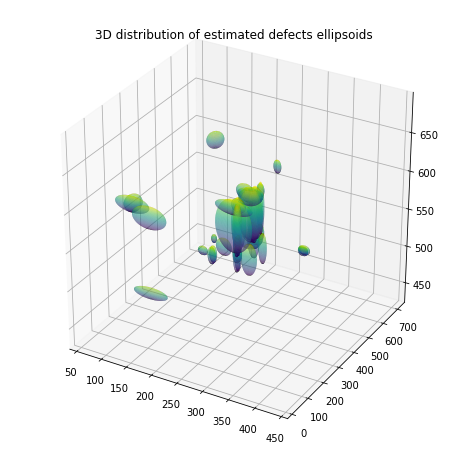

Wall time: 1min 50s


In [72]:
%%time
all_ellipsoids_3D(Ellipsoid_features,40)#40 for better visualisation of the ellipsoids